<a href="https://colab.research.google.com/github/kzengg/Project-2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Data Set 1

**Source:** https://www.kaggle.com/datasets/karthikbhandary2/property-rentals

**Description:** This data set contains data on different properties. It includes details about each property rented, as well as the price charged per night. It includes 9 columns.

**Target:** Price per night

**Classification/Regression:** Regression

**Features:** 5

**# of Rows:** 2222

**Possible Challenges:** Majority of the data is skewed towards 4 property types. 

In [110]:
dataset1 = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQklOtJEwS6tKqnELsZLnmHyHf9l3zakWMlWR5A3_xFaxjJdlT5WjpocMv2Mhay5pxrSX3LFF6aRND7/pub?output=csv'

#Dataset Information

In [111]:
df = pd.read_csv(dataset1)
df.head()

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
0,958,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,$170.00
1,3850,37.75402,-122.45805,House,Private room,1.0,1.0,1,$99.00
2,5858,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,$235.00
3,7918,37.76669,-122.45250,Apartment,Private room,4.0,1.0,32,$65.00
4,8142,37.76487,-122.45183,Apartment,Private room,4.0,1.0,32,$65.00


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222 entries, 0 to 2221
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2222 non-null   int64  
 1   latitude        2222 non-null   float64
 2   longitude       2222 non-null   float64
 3   property_type   2222 non-null   object 
 4   room_type       2222 non-null   object 
 5   bathrooms       2211 non-null   float64
 6   bedrooms        2221 non-null   float64
 7   minimum_nights  2222 non-null   int64  
 8   price           2222 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 156.4+ KB


In [113]:
#checking for consistencies
df['room_type'].value_counts()

Entire home/apt    1383
Private room        778
Shared room          53
Hotel room            8
Name: room_type, dtype: int64

In [114]:
#check for duplicates
df.duplicated().sum()

0

In [115]:
#checking for missing
df.isna().sum()

id                 0
latitude           0
longitude          0
property_type      0
room_type          0
bathrooms         11
bedrooms           1
minimum_nights     0
price              0
dtype: int64

In [116]:
#view the data where null is true
print(df[df['bathrooms'].isnull()])

          id  latitude  longitude property_type        room_type  bathrooms  \
139   144978  37.79336 -122.42506     Apartment     Private room        NaN   
181   229240  37.79341 -122.40340        Hostel      Shared room        NaN   
196   259621  37.79470 -122.40374        Hostel      Shared room        NaN   
197   259622  37.79441 -122.40473        Hostel      Shared room        NaN   
267   430692  37.75906 -122.40761     Apartment     Private room        NaN   
352   596042  37.79384 -122.42436     Apartment     Private room        NaN   
434   785901  37.79313 -122.40443        Hostel      Shared room        NaN   
435   786492  37.79421 -122.40310        Hostel      Shared room        NaN   
436   786506  37.79260 -122.40339        Hostel      Shared room        NaN   
539  1031899  37.74833 -122.42621     Apartment  Entire home/apt        NaN   
606  1206233  37.77028 -122.44757     Apartment     Private room        NaN   

     bedrooms  minimum_nights    price  
139       

#Cleaning Up Data

In [117]:
#Based on my observation on property type, missing values for bathrooms and bedrooms are meant to be 0. 
df['bathrooms'].fillna(value = 0, inplace = True)
df['bedrooms'].fillna(value = 0, inplace = True)
df.isna().sum()

id                0
latitude          0
longitude         0
property_type     0
room_type         0
bathrooms         0
bedrooms          0
minimum_nights    0
price             0
dtype: int64

In [118]:
#ID, Latitude, Longitude will not have any value for ML models
df.drop(['id','latitude','longitude'], axis=1, inplace=True)
df.head()

,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
0,Apartment,Entire home/apt,1.0,1.0,1,$170.00
1,House,Private room,1.0,1.0,1,$99.00
2,Apartment,Entire home/apt,1.0,2.0,30,$235.00
3,Apartment,Private room,4.0,1.0,32,$65.00
4,Apartment,Private room,4.0,1.0,32,$65.00


In [ ]:
#some of the price values were in quotations which prevented conversion from string to float
df['price'] = df['price'].apply(lambda x: x.replace('"', ''))
#Source: https://stackabuse.com/bytes/remove-quotes-from-all-rows-in-dataframe-column/

In [ ]:
df[df['minimum_nights'] == 365]

,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
57,Apartment,Entire home/apt,1.0,2.0,365,"$9,999.00"
312,Apartment,Entire home/apt,1.0,1.0,365,$200.00
555,Loft,Entire home/apt,1.5,1.0,365,$180.00
637,Apartment,Entire home/apt,2.0,3.0,365,$200.00
1349,Apartment,Entire home/apt,2.5,3.0,365,$296.00
2018,Apartment,Entire home/apt,2.0,1.0,365,$160.00


In [140]:
#converting price (string) to float.
df['price']=df['price'].replace( '''[\$,)]''','', regex=True).astype(float)

#Visuals

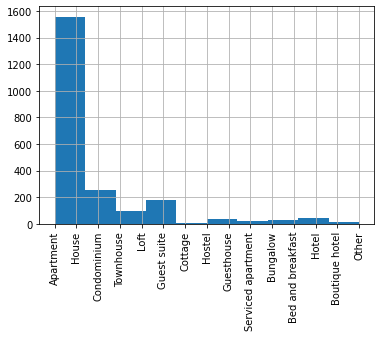

In [120]:
df['property_type'].hist()
plt.xticks(rotation = 90);

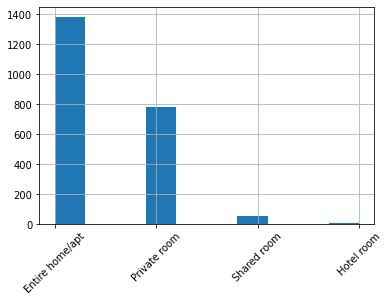

In [121]:
df['room_type'].hist()
plt.xticks(rotation = 45);

>2 bathrooms appears to be outliers.


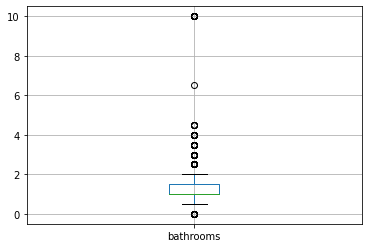

In [122]:
df.boxplot(column='bathrooms')
print(f'>2 bathrooms appears to be outliers.')

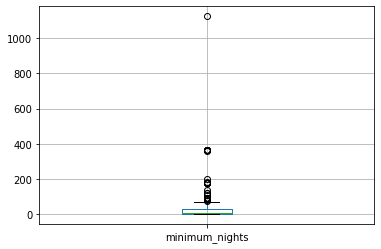

In [123]:
df.boxplot(column='minimum_nights')

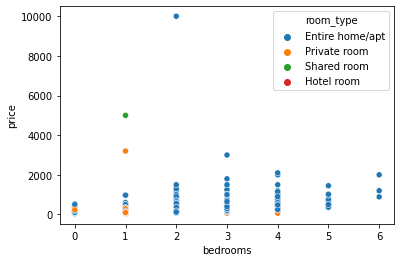

In [145]:
sns.scatterplot(data=df, x="bedrooms", y="price",hue = "room_type");

In [147]:
df.describe()

,bathrooms,bedrooms,minimum_nights,price
count,2222.000000,2222.000000,2222.000000,2222.000000
mean,1.354860,1.438344,16.021152,227.611611
std,0.917326,0.937741,35.814332,319.505827
min,0.000000,0.000000,1.000000,29.000000
25%,1.000000,1.000000,2.000000,109.000000
50%,1.000000,1.000000,4.000000,155.000000
75%,1.500000,2.000000,30.000000,250.000000
max,10.000000,6.000000,1125.000000,9999.000000


Outliers: bathrooms > 1.5, bedrooms > 2, minimum nights >30, price > 250. Should be noted that outlier for price doesnt no consider like to like comparison for minimum nights required. The price shown is the total cost for the minimum nights expected.